# Prueba de los mejores modelos usando el conjunto de validación para R7

## Librerias necesarias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ks_2samp
import joblib


## Lectura del dataframe del conjunto de validación

In [2]:
df = pd.read_csv('../data/r7/r7_val.csv', sep='|')

df.head()

,g45µ,sba,pf,so3,mgo,sio2,fe2o3,caot,al2o3,na2o,k2o,r7_iram1622
0,0.741036,0.557920,-0.722349,0.160186,0.585426,0.790110,0.544710,-0.238268,1.393083,0.851931,-0.011456,46.5
1,-0.624190,0.557920,-1.155250,0.912932,-0.045736,1.762798,-0.512521,-1.139153,1.495654,0.268635,0.522871,49.5
2,0.342845,0.357174,-1.121074,0.254279,0.814940,1.478739,1.086880,0.314548,1.495654,0.463067,0.370206,48.1
3,-0.965496,-0.094506,-0.710957,0.066093,0.183777,0.858973,-1.244450,-1.169864,1.680282,1.046363,0.802756,43.6
4,0.191154,-1.198612,-0.471722,0.536559,0.183777,-0.346127,-1.434209,1.287094,-0.473710,-0.897956,-0.011456,46.2


## Conjuntos X y Y para validación

In [3]:
X_val = df.drop(columns=['r7_iram1622'])
y_val = df['r7_iram1622']

## Carga de los modelos

In [4]:
model_rmse_path = '../model/r7_models/r7_best_model_rmse.joblib'
model_mae_path = '../model/r7_models/r7_best_model_mae.joblib'
model_r2_path = '../model/r7_models/r7_best_model_r2.joblib'

model_rmse = joblib.load(model_rmse_path)
model_mae = joblib.load(model_mae_path)
model_r2 = joblib.load(model_r2_path)

## Predicciones con cada modelo

In [5]:
y_val_pred_rmse = model_rmse.predict(X_val)
y_val_pred_mae = model_mae.predict(X_val)
y_val_pred_r2 = model_r2.predict(X_val)

## Gráficas de comparación de los valores reales vs predichos

### Métrica RMSE

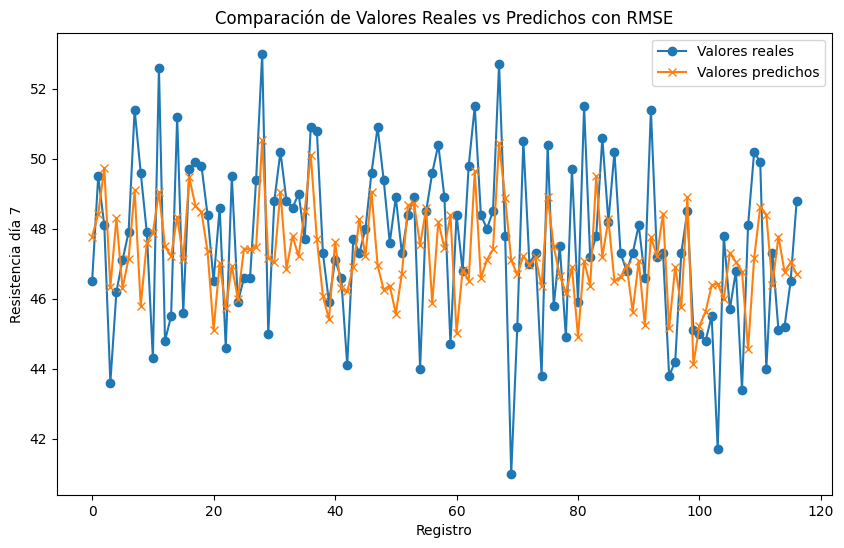

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(y_val.values, label='Valores reales', marker='o')
plt.plot(y_val_pred_rmse, label='Valores predichos', marker='x')
plt.title("Comparación de Valores Reales vs Predichos con RMSE")
plt.xlabel("Registro")
plt.ylabel("Resistencia día 7")
plt.legend()
plt.show()

### Métrica MAE

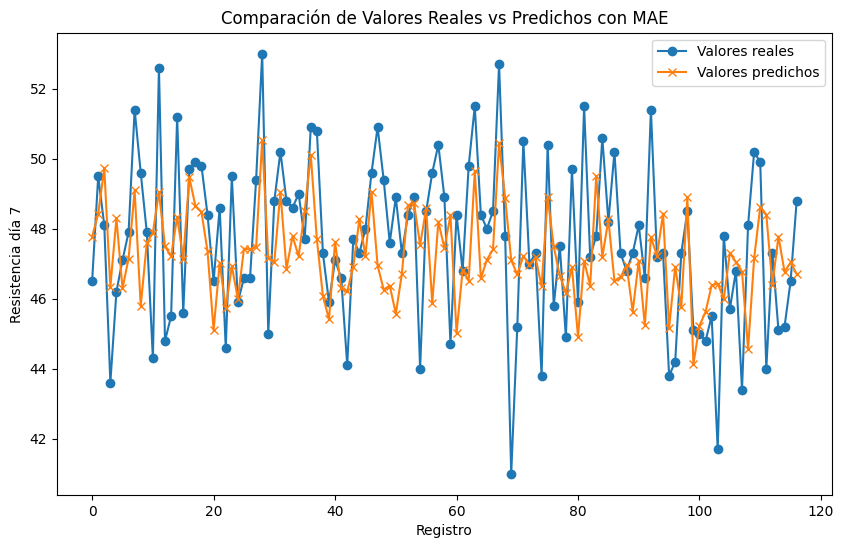

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(y_val.values, label='Valores reales', marker='o')
plt.plot(y_val_pred_mae, label='Valores predichos', marker='x')
plt.title("Comparación de Valores Reales vs Predichos con MAE")
plt.xlabel("Registro")
plt.ylabel("Resistencia día 7")
plt.legend()
plt.show()

### Métrica R²

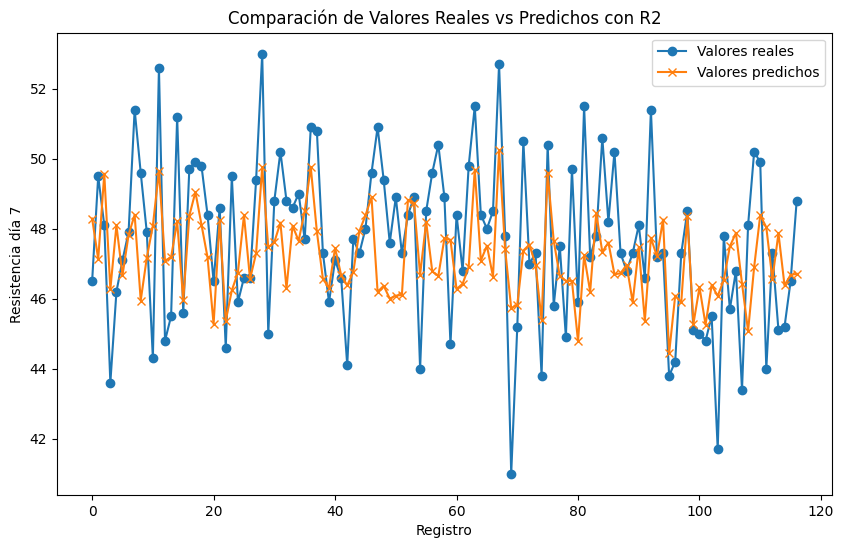

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(y_val.values, label='Valores reales', marker='o')
plt.plot(y_val_pred_r2, label='Valores predichos', marker='x')
plt.title("Comparación de Valores Reales vs Predichos con R2")
plt.xlabel("Registro")
plt.ylabel("Resistencia día 7")
plt.legend()
plt.show()

## Distribución de los conjuntos para R7

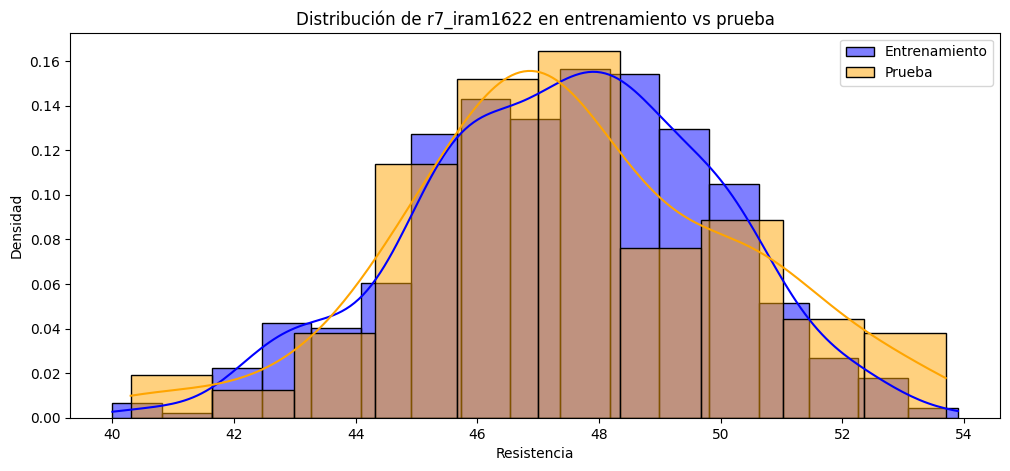

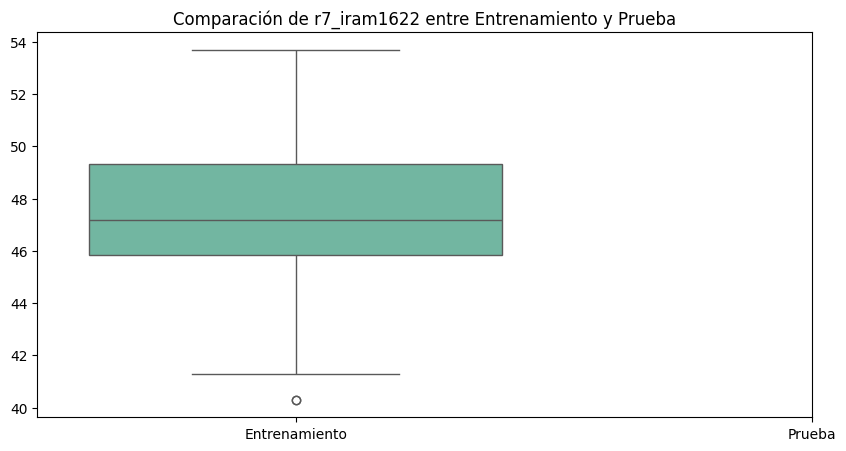

In [9]:
train_data = pd.read_csv('../data/r7/r7_train.csv', sep='|')
test_data = pd.read_csv('../data/r7/r7_test.csv', sep='|')

column = 'r7_iram1622'

# Histograma
plt.figure(figsize=(12, 5))
sns.histplot(train_data[column], color='blue', label='Entrenamiento', kde=True, stat="density")
sns.histplot(test_data[column], color='orange', label='Prueba', kde=True, stat="density")
plt.xlabel("Resistencia")
plt.ylabel("Densidad")
plt.legend()
plt.title(f'Distribución de {column} en entrenamiento vs prueba')
plt.show()

# Box plot
plt.figure(figsize=(10, 5))
sns.boxplot(data=[train_data[column], test_data[column]], palette="Set2")
plt.xticks([0, 1], ['Entrenamiento', 'Prueba'])
plt.title(f'Comparación de {column} entre Entrenamiento y Prueba')
plt.show()

## Resumen de las estadísticas de los conjuntos de entrenamiento y prueba

In [10]:
# Estadísticas resumen para el conjunto de entrenamiento
print("Estadísticas del conjunto de entrenamiento:\n", train_data.describe())

# Estadísticas resumen para el conjunto de prueba
print("Estadísticas del conjunto de prueba:\n", test_data.describe())

Estadísticas del conjunto de entrenamiento:
              g45µ         sba          pf         so3         mgo        sio2  \
count  548.000000  548.000000  548.000000  548.000000  548.000000  548.000000   
mean    -0.076210    0.148276   -0.227186   -0.010315    0.085250    0.262329   
std      0.918243    0.995682    0.927490    0.664484    0.800217    0.942950   
min     -4.075177   -2.654023   -1.497014   -2.850799   -4.349119   -1.577051   
25%     -0.666853   -0.445812   -0.950192   -0.333804   -0.447385   -0.804496   
50%     -0.169114    0.056054   -0.642604   -0.028001    0.241156    0.660992   
75%      0.361807    0.658293    0.761476    0.254279    0.585426    0.970875   
max      4.514369    4.171356    2.672506    2.512518    2.708428    1.762798   

            fe2o3        caot       al2o3        na2o         k2o  r7_iram1622  
count  548.000000  548.000000  548.000000  548.000000  548.000000   548.000000  
mean     0.090000   -0.226237    0.212768    0.211867    0.0165

### Análisis Asimetría y Curtosis

#### Asimetría (Skewness)

La asimetría mide la simetría de la distribución de los datos. Indica si los datos están sesgados hacia la izquierda o hacia la derecha

* Asimetría positiva: La cola derecha de la distribución es más larga o más pesada que la cola izquierda. Los valores están sesgados hacia la derecha
* Asimetría negativa: La cola izquierda de la distribución es más larga o más pesada que la cola derecha. Los valores están sesgados hacia la izquierda
* Asimetría cercana a 0: La distribución es aproximadamente simétrica

#### Curtosis (Kurtosis)

La curtosis mide la "agudeza" de la distribución de los datos. Indica si los datos tienen colas más pesadas o más ligeras que una distribución normal

* Curtosis positiva (leptocúrtica): La distribución tiene colas más pesadas y un pico más alto y estrecho que una distribución normal. Indica la presencia de valores extremos
* Curtosis negativa (platicúrtica): La distribución tiene colas más ligeras y un pico más bajo y ancho que una distribución normal. Indica una menor presencia de valores extremos
* Curtosis cercana a 0 (mesocúrtica): La distribución tiene una forma similar a la distribución normal

La asimetría y la curtosis son métricas útiles para entender la distribución de tus datos. Ayudan a identificar posibles problemas de sesgo y la presencia de valores extremos, lo que puede influir en el rendimiento y la generalización de tu modelo

In [11]:
def print_skewness_kurtosis(data, dataset_name):
    skewness = data.skew()
    kurtosis = data.kurtosis()
    
    print(f"Asimetría y curtosis del conjunto de {dataset_name}:\n")
    print("Asimetría:")
    print(skewness)
    print("\nCurtosis:")
    print(kurtosis)
    print("\n")

print_skewness_kurtosis(train_data, "Entrenamiento")
print_skewness_kurtosis(test_data, "Prueba")

Asimetría y curtosis del conjunto de Entrenamiento:

Asimetría:
g45µ           0.864926
sba            0.511743
pf             0.763769
so3            0.393171
mgo           -1.350670
sio2          -0.449617
fe2o3          0.049420
caot           0.499825
al2o3         -0.189619
na2o          -0.607243
k2o            2.128448
r7_iram1622   -0.203008
dtype: float64

Curtosis:
g45µ            3.682522
sba             1.163438
pf             -0.830408
so3             2.462109
mgo             5.834976
sio2           -1.266817
fe2o3          -0.946803
caot           -0.001740
al2o3          -0.701699
na2o           -0.953345
k2o            25.842609
r7_iram1622    -0.219952
dtype: float64


Asimetría y curtosis del conjunto de Prueba:

Asimetría:
g45µ           2.521439
sba            0.330192
pf             0.584492
so3            0.118264
mgo           -2.398630
sio2          -0.537798
fe2o3          0.211797
caot           0.298597
al2o3         -0.046791
na2o          -0.523830
k2o     

## Test de Kolmogorov-Smirnov

El test de Kolmogorov-Smirnov (KS) es una prueba estadística no paramétrica que se utiliza para comparar una muestra con una distribución de referencia (univariada) o para comparar dos muestras. El test mide la distancia máxima entre las funciones de distribución acumulativa (CDF) de las dos muestras o entre la muestra y la distribución de referencia

Interpretación de los resultados

* Estadístico KS: Este valor representa la distancia máxima entre las funciones de distribución acumulativa (CDF) de las dos muestras. Un valor más alto indica una mayor diferencia entre las distribuciones

* P-valor: Este valor indica la probabilidad de observar una distancia tan grande (o mayor) entre las CDFs bajo la hipótesis nula de que las dos muestras provienen de la misma distribución

    * P-valor bajo (por ejemplo, < 0.05): Rechazamos la hipótesis nula, lo que sugiere que las dos muestras provienen de distribuciones diferentes
    * P-valor alto (por ejemplo, ≥ 0.05): No rechazamos la hipótesis nula, lo que sugiere que no hay evidencia suficiente para decir que las dos muestras provienen de distribuciones diferentes

In [12]:
column = 'r7_iram1622'

ks_statistic, p_value = ks_2samp(train_data[column], test_data[column])

print(f"Kolmogorov-Smirnov test para la característica {column}:")
print(f"Estadístico KS: {ks_statistic}")
print(f"P-valor: {p_value}")

Kolmogorov-Smirnov test para la característica r7_iram1622:
Estadístico KS: 0.07617839910924162
P-valor: 0.5949023244573042


## Prueba con datos individuales

In [13]:
nuevos_datos = pd.DataFrame({
    'g45µ': [0.1153077297169385],
    'sba': [-0.5461855488003998],
    'pf': [-0.7337414236344953],
    'so3': [-0.3102805151549646],
    'mgo': [-0.5621423068459931],
    'sio2': [0.540482006596798],
    'fe2o3': [-0.648063162644343],
    'caot': [0.2121748080122585],
    'al2o3': [0.3878869412718271],
    'na2o': [0.8519306917922146],
    'k2o': [-0.036900123473081047]
})

In [14]:
# Hacer predicciones con los modelos cargados
pred_rmse = model_rmse.predict(nuevos_datos)
pred_mae = model_mae.predict(nuevos_datos)
pred_r2 = model_r2.predict(nuevos_datos)

values_models = [pred_rmse, pred_mae, pred_r2]

print("Predicciones con el modelo RMSE:", pred_rmse)
print("Predicciones con el modelo MAE:", pred_mae)
print("Predicciones con el modelo R2:", pred_r2)

Predicciones con el modelo RMSE: [47.81691734]
Predicciones con el modelo MAE: [47.81691734]
Predicciones con el modelo R2: [48.47288652]


In [15]:
print(f"Rango prediccion modelos {min(values_models)} - {max(values_models)}")

Rango prediccion modelos [47.81691734] - [48.47288652]
